# Using StatsModels
Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

1. Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
2. Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().

In [1]:
from empiricaldist import Pmf
from empiricaldist import Cdf
from scipy.stats import norm
from scipy.stats import linregress

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

In [2]:
#Load Data
BRFSS = r'F:\Data Analysis\Springboard\Data Science Career Track\8.Exploratory Data Analysis in Python\Datasets\brfss.hdf5'

brfss = pd.read_hdf(BRFSS)
brfss

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0
...,...,...,...,...,...,...,...,...,...
376876,1.0,173.0,97.52,8.0,12018.935300,3.0,5.57,170.0,32.0
201499,1.0,170.0,68.04,5.0,1939.162770,13.0,2.71,160.0,89.5
192176,1.0,183.0,117.93,4.0,762.342004,8.0,0.53,180.0,57.0
342705,1.0,175.0,61.23,5.0,1417.690180,2.0,4.29,170.0,27.0


In [4]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)


LinregressResult(slope=0.06988048092105248, intercept=1.5287786243362973, rvalue=0.11967005884864361, pvalue=1.3785039162157718e-238, stderr=0.002110976356332355)


In [5]:
# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

Intercept    1.528779
INCOME2      0.069880
dtype: float64


# Multiple regression


# Plot income and education
To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

1. Group gss by 'educ'. Store the result in grouped.
2. From grouped, extract 'realinc' and compute the mean.
3. Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.

In [6]:
#Load Data
GSS = r'F:\Data Analysis\Springboard\Data Science Career Track\8.Exploratory Data Analysis in Python\Datasets\gss.hdf5'

gss = pd.read_hdf(GSS)
gss

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.889300
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.444600
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.333900
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.889300
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.889300
...,...,...,...,...,...,...,...,...,...,...
62461,2016,32.0,1984.0,1,1,13.0,74880.0,1.0,NaN,0.956994
62462,2016,61.0,1955.0,2,1,16.0,65520.0,NaN,1.0,0.956994
62463,2016,67.0,1949.0,2,1,13.0,NaN,NaN,2.0,1.564363
62464,2016,57.0,1959.0,2,1,12.0,9945.0,2.0,NaN,0.956994


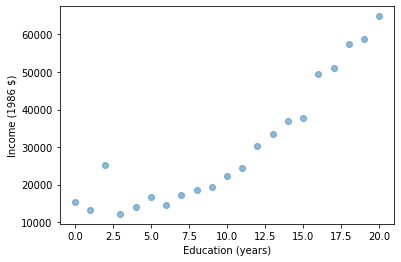

In [7]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

# Non-linear model of education
The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

1. Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
2. Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.


In [10]:
# Add a new column with educ and age squared
gss['educ2'] = (gss['educ'])**2
gss['age2'] = (gss['age'])**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


# Visualizing regression results


# Making predictions
At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

1. Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
2. Add a variable named 'age' with the constant value 30.
3. Use df to generate predicted income as a function of education.


In [11]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


# Visualizing predictions
Now let's visualize the results from the previous exercise!

1. Plot mean_income_by_educ using circles ('o'). Specify an alpha of 0.5.
2. Plot the prediction results with a line, with df['educ'] on the x-axis and pred on the y-axis.

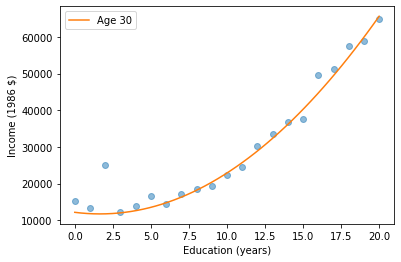

In [12]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

# Logistic regression


# Predicting a binary variable
Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

1. Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable
2. Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.
3. Generate separate predictions for men and women.
4. Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


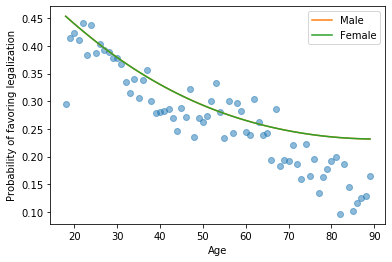

In [13]:
#1
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

#2
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2


#3
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)


#4
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred1, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()